# Performing EDA On Diwali Sales Data

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
# Use encoding = 'unicode_escape' to get rid of Unicode Decode Error 'utf-8' codec can't decode byte 0xfc in position 1: invalid start byte
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Describe the dataset

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


### Clean the data

In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

Now you can see that Amount column contains 12 null value whereas Status and unnamed1 columns are completely null. There are 2 ways to clean the data:
1. Delete the complete row that contains the null value.
2. Replace the null value with the mean value.

In [7]:
# Drop the blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Now all the null values have been removed

In [10]:
df.columns # To see the list of columns in the dataset

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Exploratory Data Analysis

#### By Gender

<Axes: xlabel='Gender', ylabel='count'>

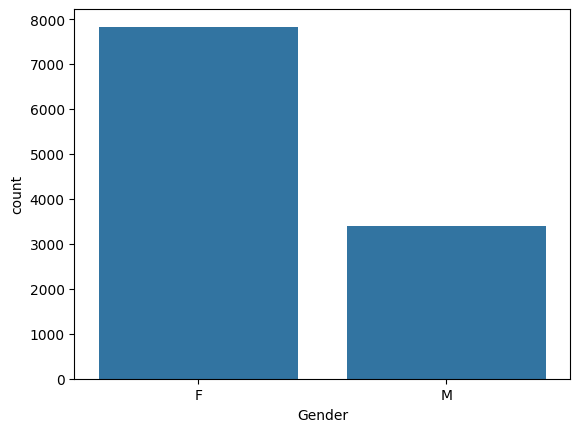

In [11]:
sns.countplot(x='Gender', data=df)

From this you can see that females have purchased more products than males.

In [12]:
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [13]:
sales_gender

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

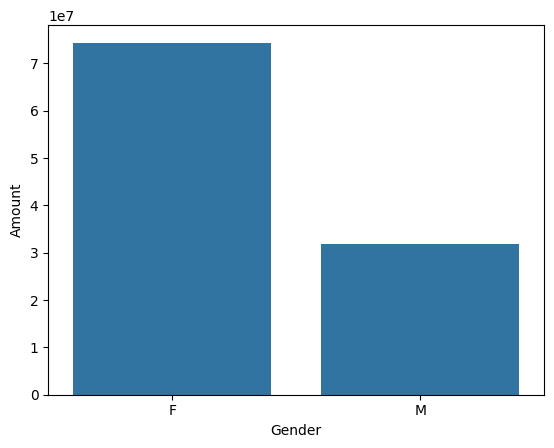

In [14]:
sns.barplot(x='Gender', y='Amount', data=sales_gender)

#### Age

<Axes: xlabel='Age Group', ylabel='count'>

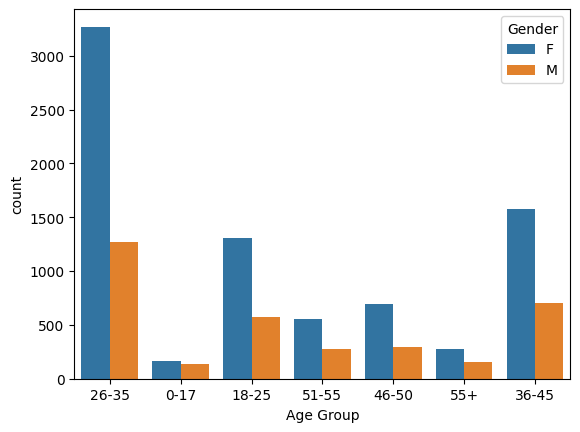

In [15]:
sns.countplot(x='Age Group', hue='Gender', data=df)

From this you can see that females between the ages of 26-35 have made the most purchases.

<Axes: xlabel='Age Group', ylabel='Amount'>

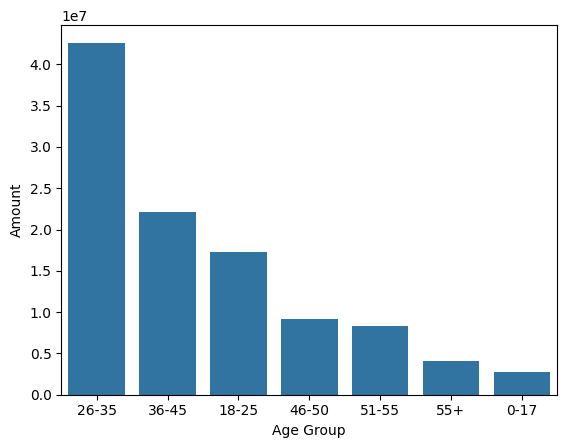

In [16]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)

From this we can see that most buyers lie between 26-35

#### State

<Axes: xlabel='State', ylabel='Orders'>

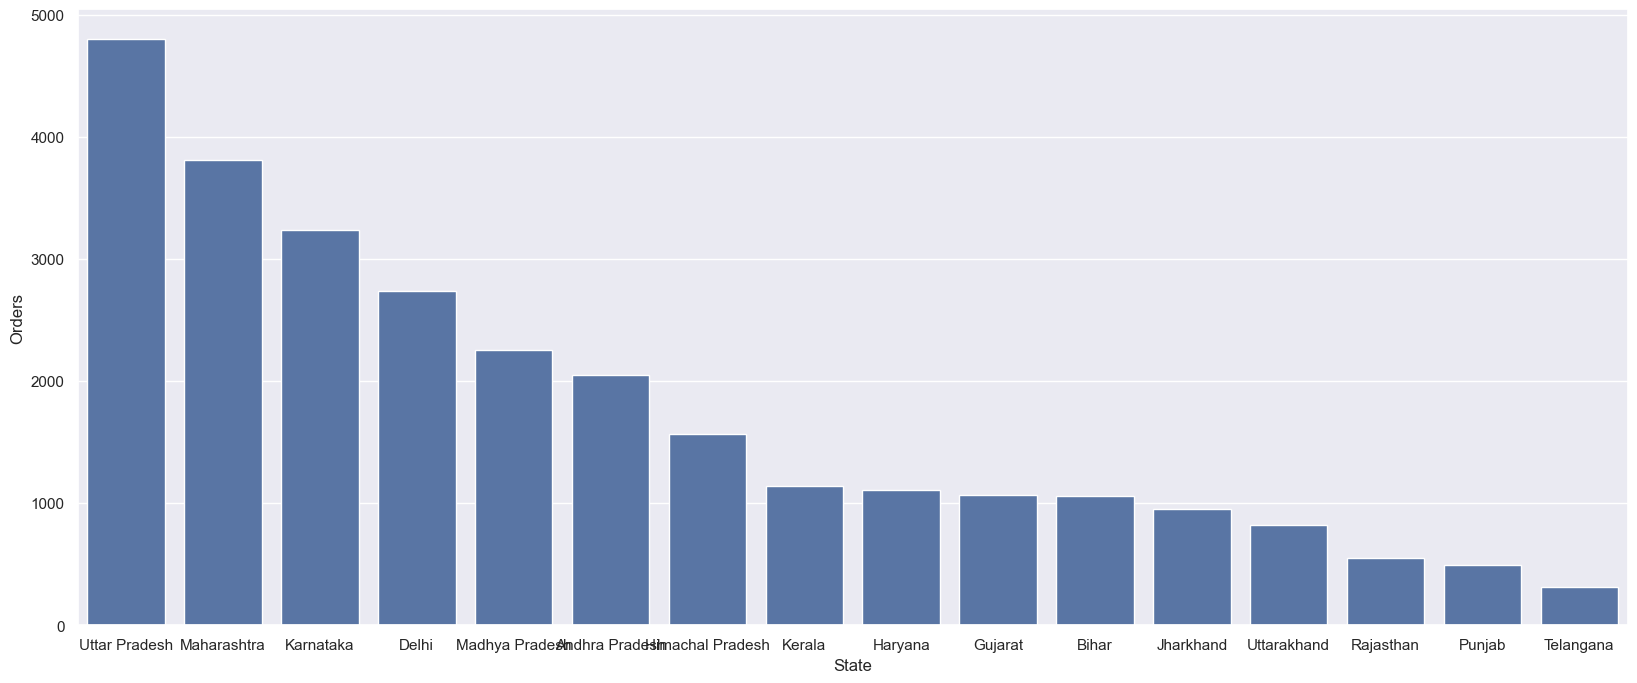

In [17]:
order_states = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='State', y='Orders', data=order_states)

<Axes: xlabel='State', ylabel='Amount'>

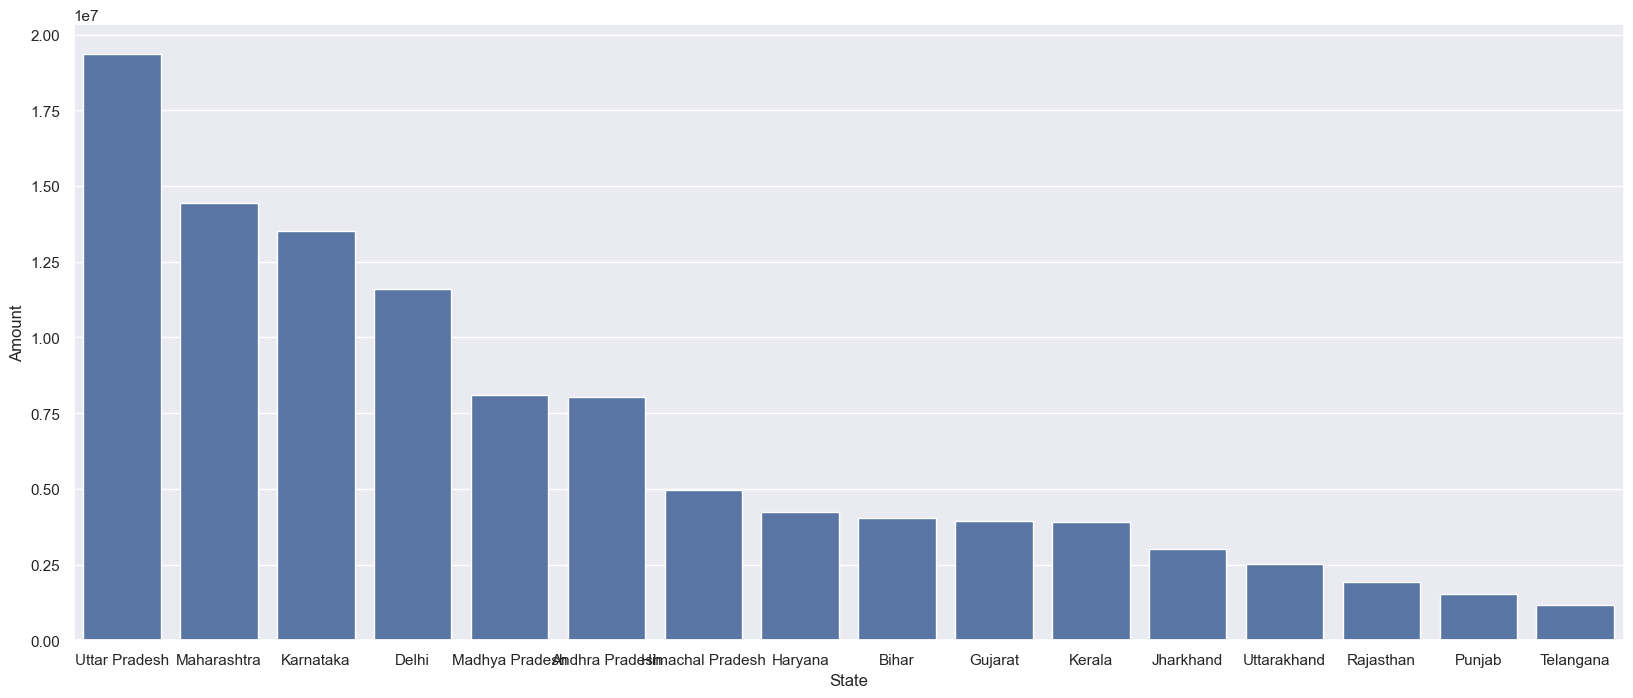

In [18]:
sales_states = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='State', y='Amount', data=sales_states)

From the graphs you can see that 'Uttar Pradesh' state has the most orders as well as revenue.

#### Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

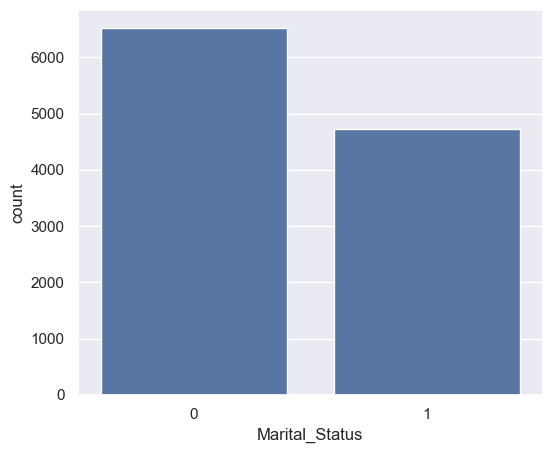

In [19]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(x='Marital_Status', data=df)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

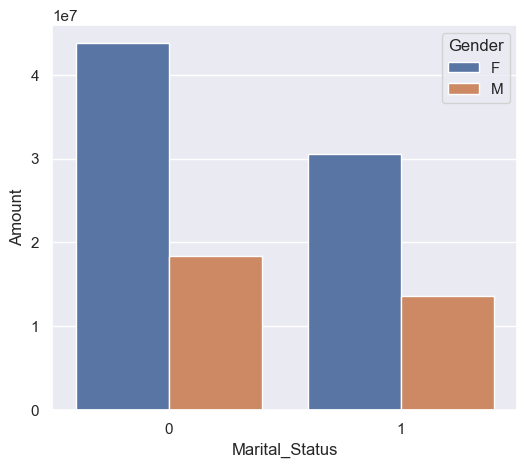

In [20]:
sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum()
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_marital)

#### Occupation

<Axes: xlabel='Occupation', ylabel='count'>

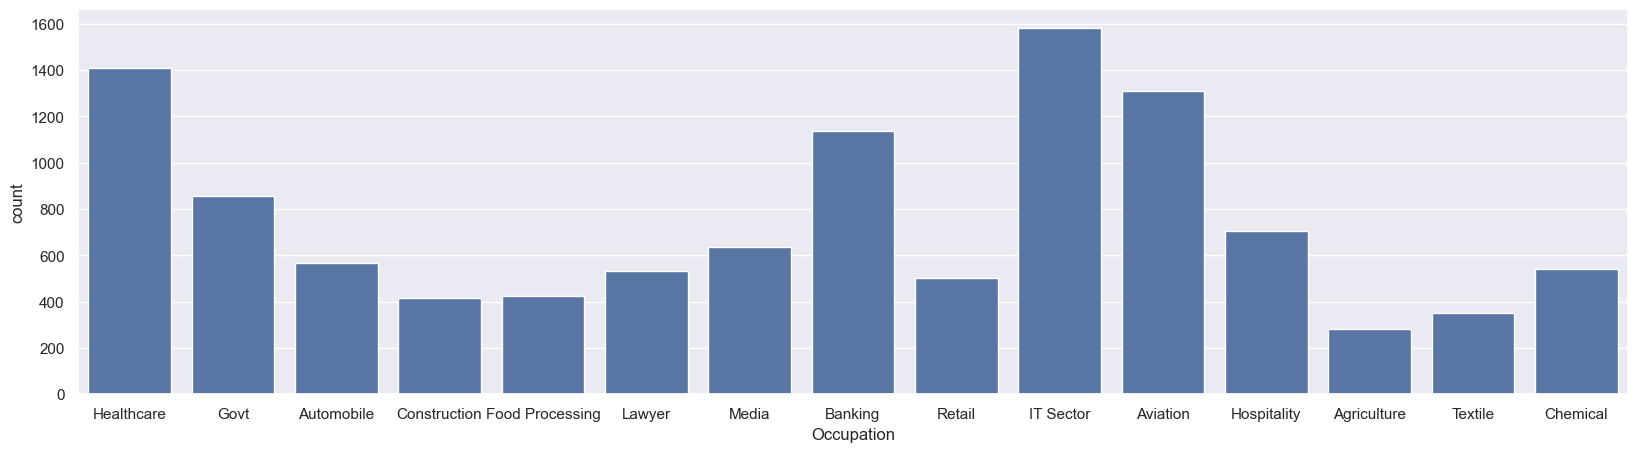

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='Occupation', data=df)

<Axes: xlabel='Occupation', ylabel='Amount'>

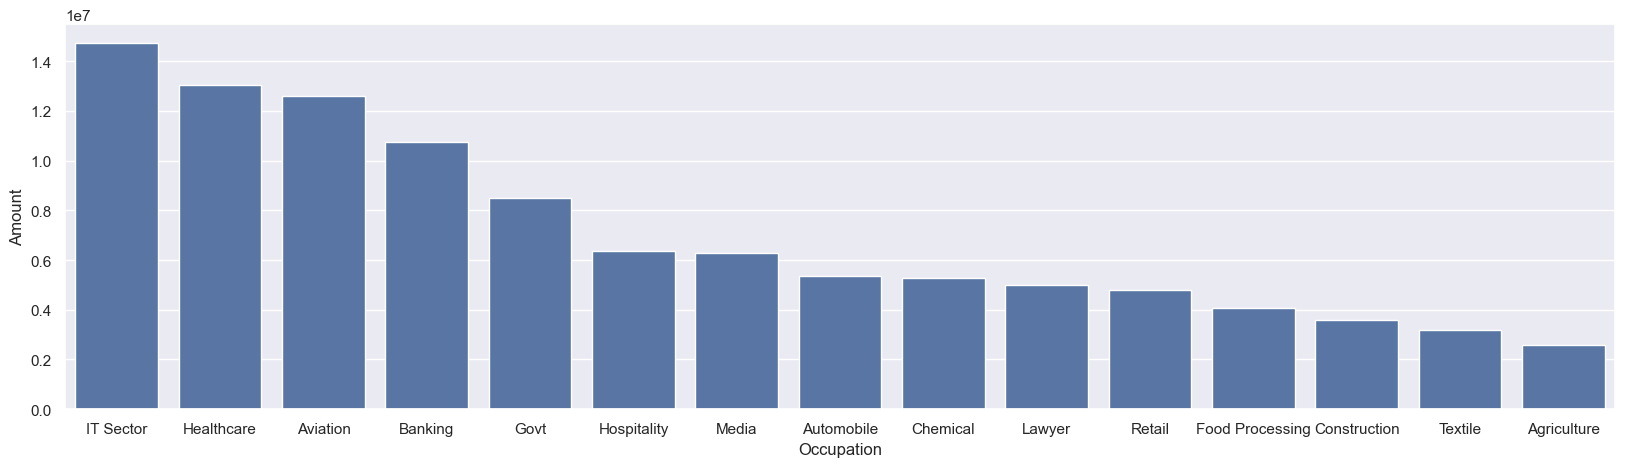

In [22]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Occupation', y='Amount', data=sales_occupation)

#### Product Category

<Axes: xlabel='Product_Category', ylabel='count'>

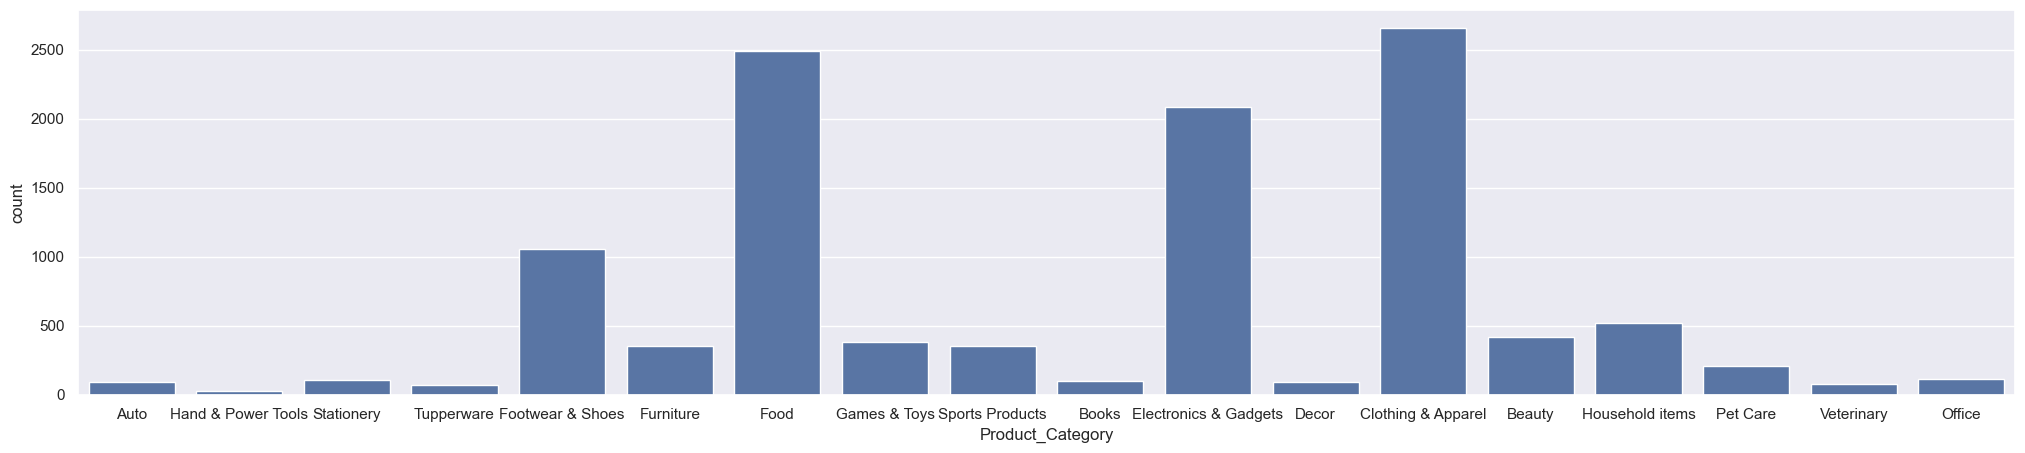

In [23]:
sns.set(rc={'figure.figsize':(25,5)})
sns.countplot(x='Product_Category', data=df)

<Axes: xlabel='Product_Category', ylabel='Amount'>

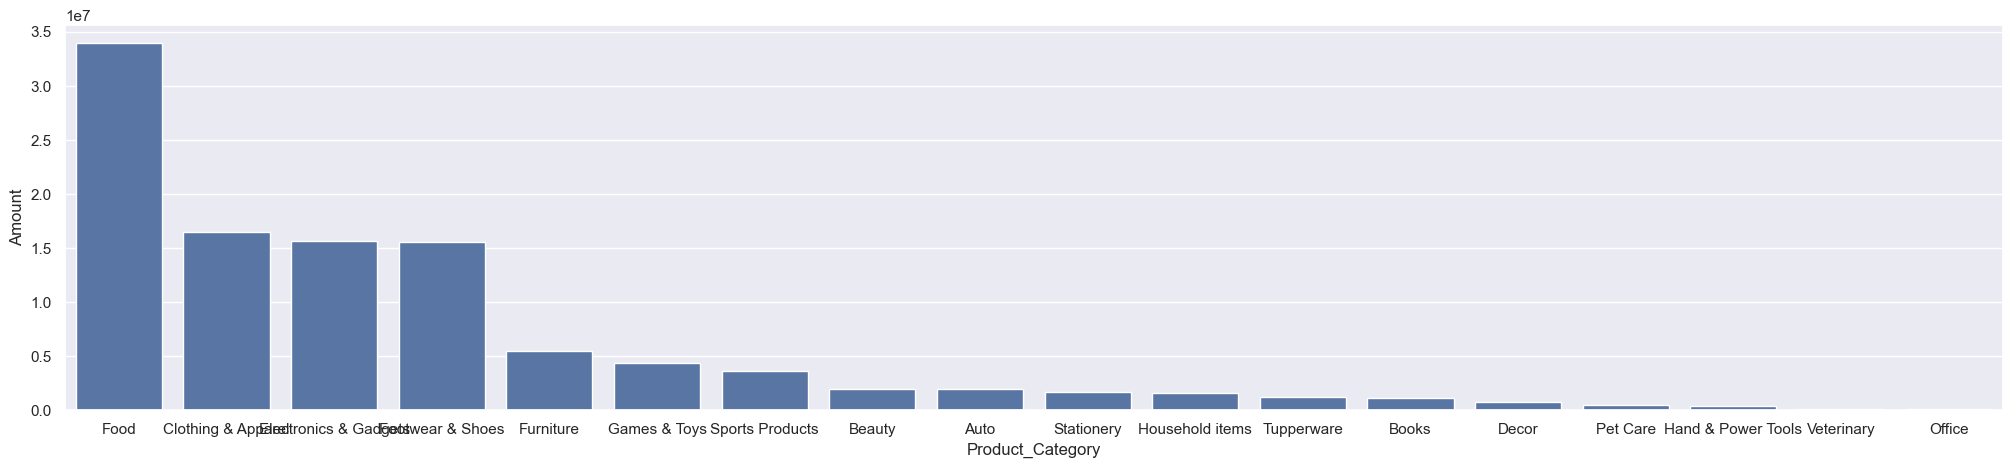

In [24]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Product_Category', y='Amount', data=sales_product)

<Axes: xlabel='Product_Category', ylabel='Amount'>

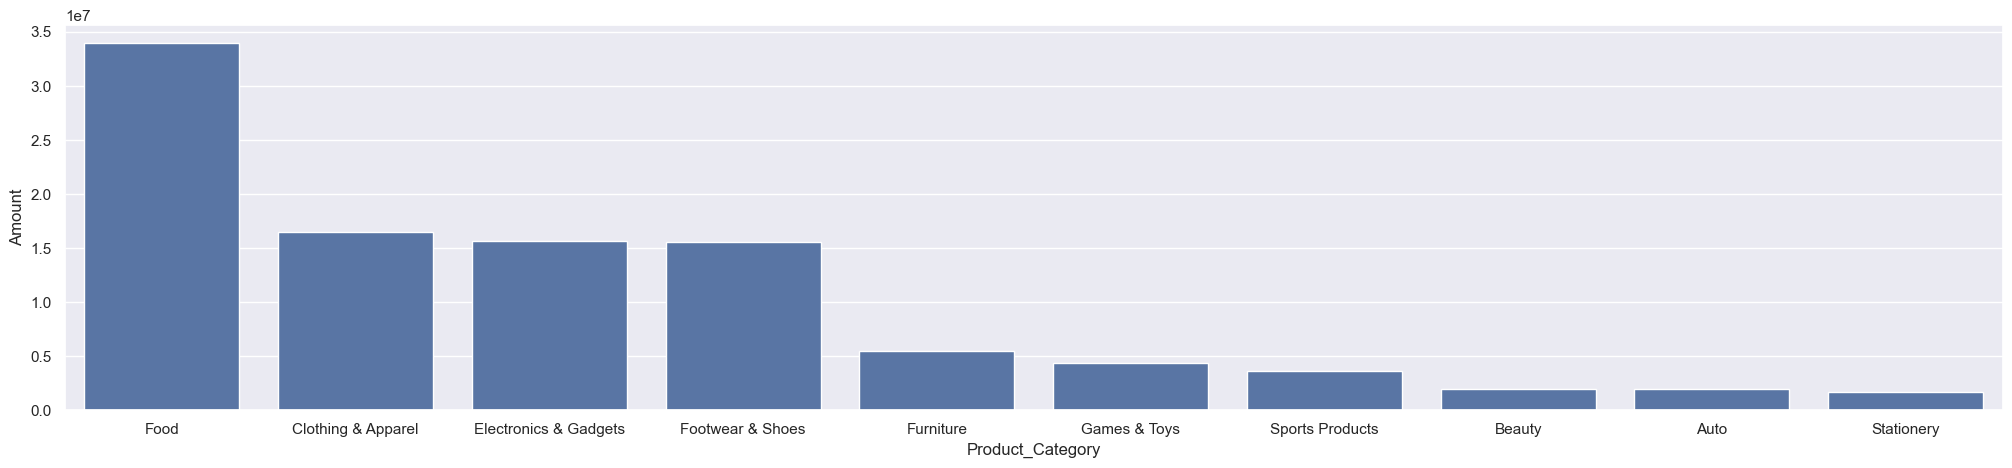

In [25]:
# Top 10 products
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='Product_Category', y='Amount', data=sales_product)

<Axes: xlabel='Product_Category', ylabel='Orders'>

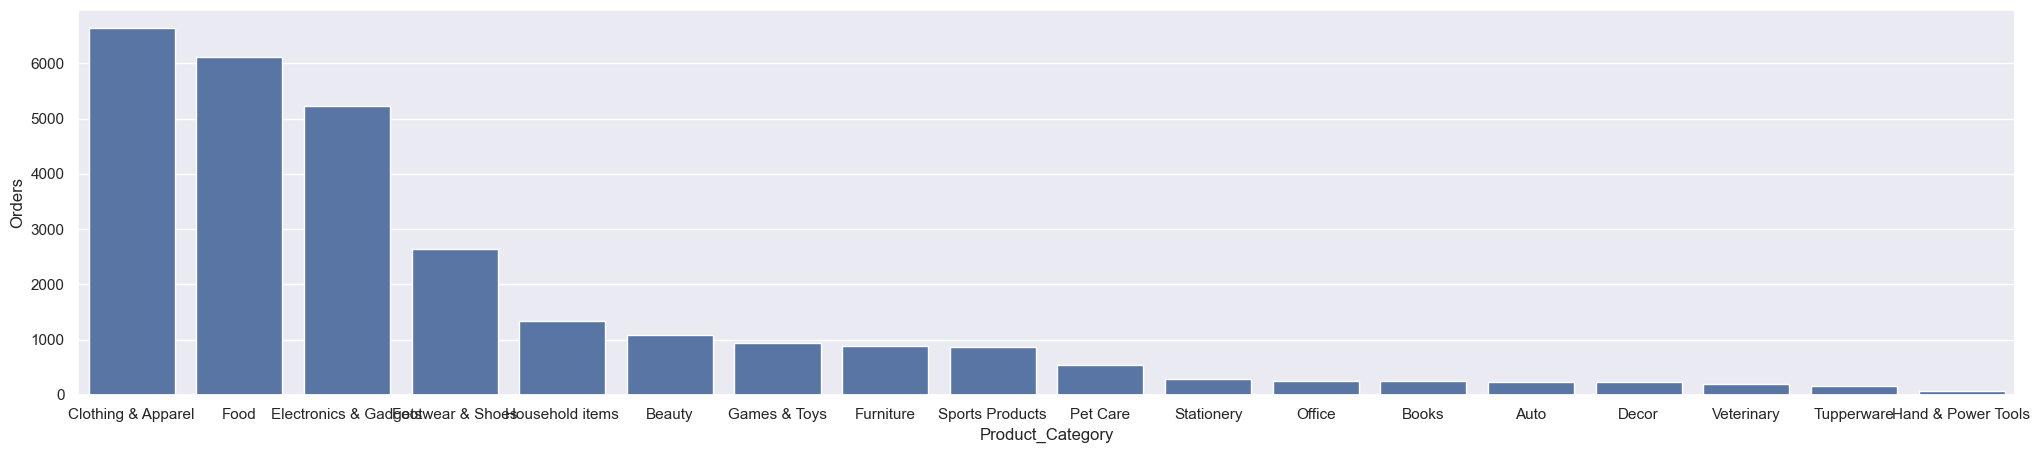

In [26]:
orders_product = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.barplot(x='Product_Category', y='Orders', data=orders_product)

<Axes: xlabel='Product_Category'>

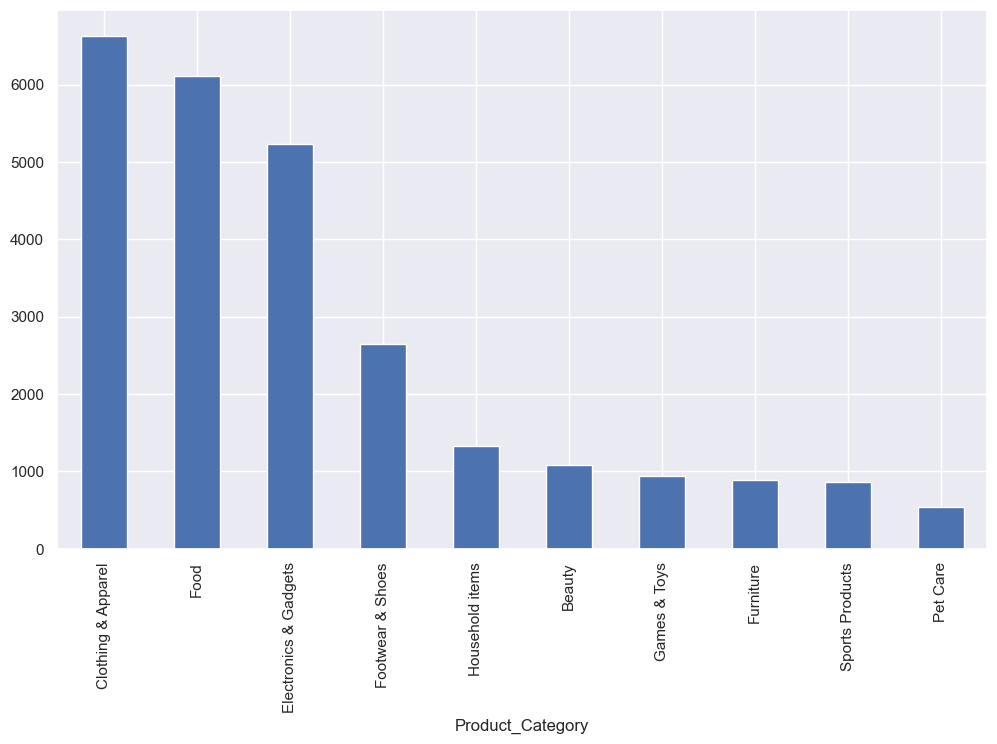

In [28]:
# Top 10 sold products
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_Category')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

As you can see the most sales were of clothing and apparel than food.
But the most revenue generated was by food.